In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import association_rules , apriori 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Q1→→→ANS→→→Book_Dataset

In [2]:
book = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\9_Association_Rule\book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

# Rule 1) For 10% support & 60% confidence

In [5]:
score = apriori(book , min_support=0.1 , use_colnames= True)
score

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [6]:
rules = association_rules(score , metric='lift',min_threshold=0.6)
rules.sort_values('confidence' , ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
84,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159,0.542591
90,"(DoItYBks, GeogBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354,0.546010
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
53,"(RefBks, ChildBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534,0.550345
...,...,...,...,...,...,...,...,...,...,...
91,(CookBks),"(DoItYBks, GeogBks)",0.4310,0.1325,0.1085,0.251740,1.899926,0.051392,1.159357,0.832449
75,(ChildBks),"(DoItYBks, GeogBks)",0.4230,0.1325,0.1045,0.247045,1.864490,0.048452,1.152127,0.803571
81,(ChildBks),"(ArtBks, GeogBks)",0.4230,0.1275,0.1020,0.241135,1.891253,0.048067,1.149743,0.816724
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


Text(0, 0.5, 'Confidence')

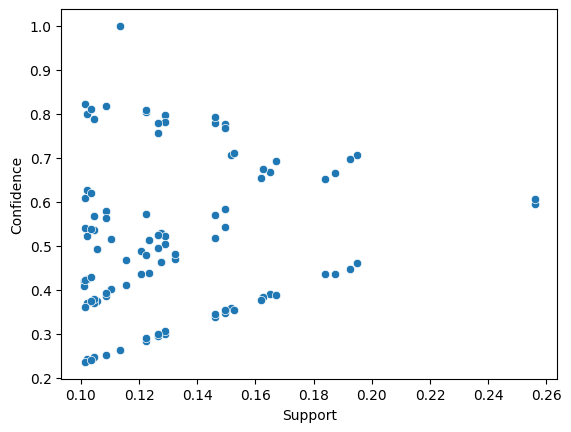

In [7]:
sns.scatterplot(x = rules['support'] , y = rules['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')

# Rule 2) For 15% support & 70% confidence

In [8]:
score1 = apriori(book , min_support= 0.15 , use_colnames= True)
score1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [9]:
rule1 = association_rules(score1 , metric='lift', min_threshold=0.7 )

rule1.sort_values('confidence' , ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095,0.498047
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
15,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968,0.489939
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842


Text(0, 0.5, 'Confidence')

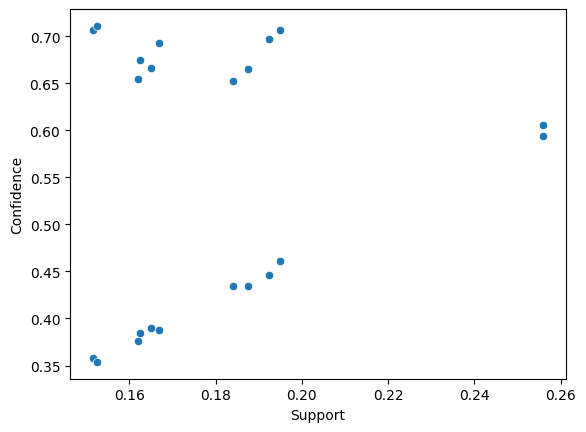

In [10]:
sns.scatterplot(x = rule1['support'] , y=rule1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')

# Rule 3) For 5% support & 90% confidence

In [11]:
score2 = apriori(book , min_support=.05 , use_colnames=True )
score2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, DoItYBks, GeogBks, YouthBks)"
96,0.0560,"(CookBks, ArtBks, GeogBks, YouthBks)"
97,0.0650,"(CookBks, ArtBks, DoItYBks, GeogBks)"
98,0.0510,"(DoItYBks, GeogBks, CookBks, YouthBks, ChildBks)"


In [12]:
rules3 = association_rules(score2 , metric='lift',min_threshold=0.9)

rules3.sort_values('confidence' , ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
507,"(GeogBks, ItalCook, ChildBks)",(CookBks),0.0525,0.4310,0.0525,1.000000,2.320186,0.029872,inf,0.600528
260,"(ArtBks, ItalCook)",(CookBks),0.0565,0.4310,0.0565,1.000000,2.320186,0.032148,inf,0.603074
35,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
266,"(GeogBks, ItalCook)",(CookBks),0.0640,0.4310,0.0640,1.000000,2.320186,0.036416,inf,0.607906
182,"(ItalCook, YouthBks)",(CookBks),0.0590,0.4310,0.0590,1.000000,2.320186,0.033571,inf,0.604676
...,...,...,...,...,...,...,...,...,...,...
514,(CookBks),"(GeogBks, ItalCook, ChildBks)",0.4310,0.0525,0.0525,0.121810,2.320186,0.029872,1.078923,1.000000
405,(ChildBks),"(RefBks, GeogBks, YouthBks)",0.4230,0.0570,0.0515,0.121749,2.135955,0.027389,1.073725,0.921708
631,(ChildBks),"(CookBks, DoItYBks, GeogBks, YouthBks)",0.4230,0.0600,0.0510,0.120567,2.009456,0.025620,1.068871,0.870629
377,(ChildBks),"(ArtBks, DoItYBks, YouthBks)",0.4230,0.0600,0.0510,0.120567,2.009456,0.025620,1.068871,0.870629


Text(0, 0.5, 'confidence')

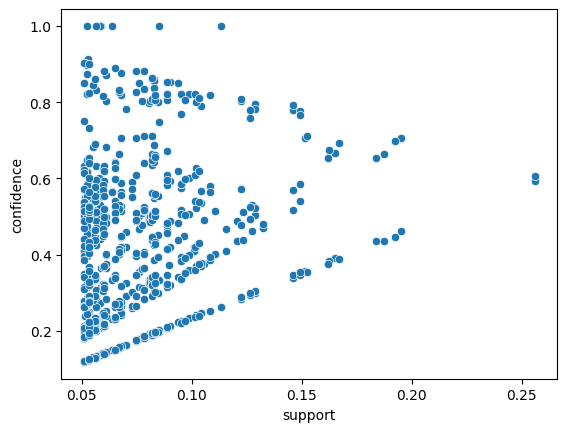

In [13]:
sns.scatterplot(x = rules3['support'] , y = rules3['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')

# Q2→→→ANS→→→Movies_Dataset

In [37]:
movie = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\9_Association_Rule\my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [38]:
movie.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [42]:
movie = movie.drop(columns= movie.iloc[: , :5])
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Rule 1) For 5% support & 90% confidence

In [44]:
score = apriori(movie , min_support=0.05 ,use_colnames= True)
score

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [46]:
mrule = association_rules(score , metric='lift' ,min_threshold= 0.9)
mrule.sort_values('confidence' , ascending= False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
119,"(Green Mile, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
167,"(LOTR1, Green Mile, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
155,"(Green Mile, Harry Potter1, Sixth Sense)",(LOTR1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
91,(Braveheart),"(Patriot, Gladiator)",0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
156,"(LOTR1, Green Mile)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
11,(Gladiator),(LOTR),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000
13,(Gladiator),(Braveheart),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000
137,(Gladiator),"(Green Mile, LOTR, Sixth Sense)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000
93,(Gladiator),"(Braveheart, Patriot)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000


Text(0, 0.5, 'confidence')

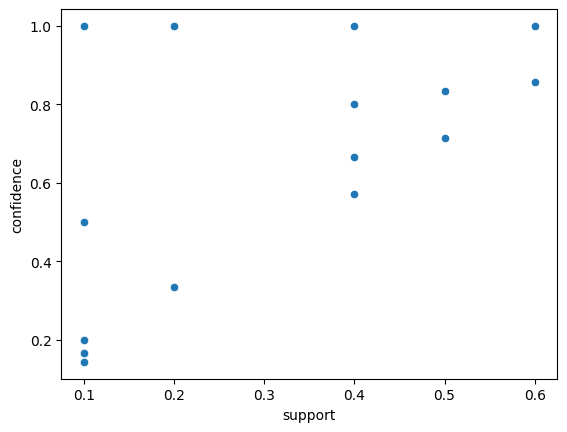

In [47]:
sns.scatterplot(x = mrule['support']  , y = mrule['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')

# Rule 2) For 10% support & 80% confidence

In [48]:
mscore = apriori(movie , min_support=0.1 , use_colnames=True)
mscore

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [49]:
mrule1 = association_rules(mscore , metric='lift' , min_threshold=0.8)
mrule1.sort_values('confidence' , ascending=False )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
161,"(LOTR1, Green Mile, Sixth Sense)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
160,"(LOTR1, Green Mile, Harry Potter1)",(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
92,"(LOTR, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
191,"(Harry Potter1, LOTR2, Sixth Sense)",(Green Mile),0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
90,"(Green Mile, LOTR)",(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
101,(Gladiator),"(Braveheart, Patriot)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000
19,(Gladiator),(Braveheart),0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000
145,(Gladiator),"(Green Mile, LOTR, Sixth Sense)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000
107,(Gladiator),"(Green Mile, LOTR)",0.7,0.1,0.1,0.142857,1.428571,0.03,1.05,1.000000


Text(0, 0.5, 'confidence')

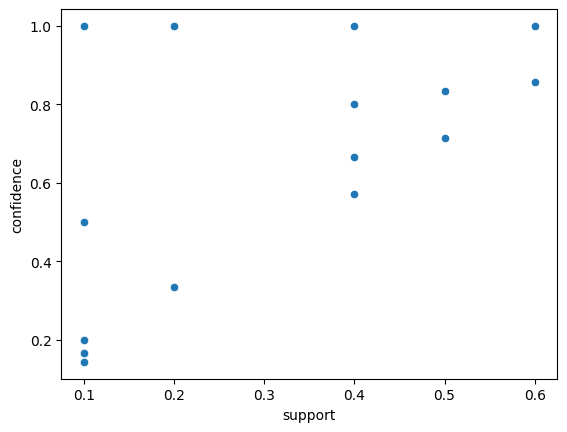

In [50]:
sns.scatterplot(x = mrule1['support']  , y = mrule1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')

# Rule 3) For 15% support & 80% confidence

In [57]:
mscore1 = apriori(movie , min_support= 0.15 , use_colnames=True)
mscore1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [58]:
mrule2 = association_rules(mscore1 , metric='lift' , min_threshold=0.8)
mrule2.sort_values('confidence' , ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
10,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
12,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000


Text(0, 0.5, 'confidence')

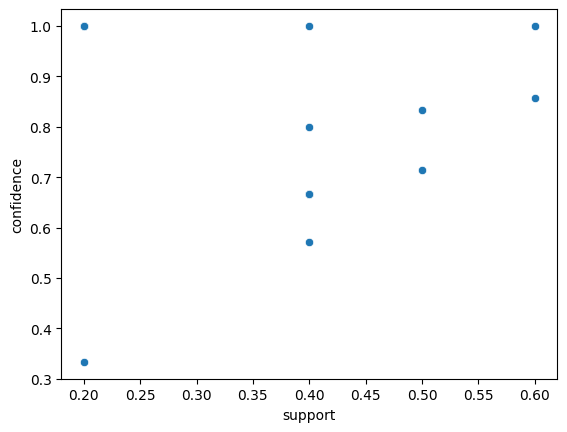

In [59]:
sns.scatterplot(x = mrule2['support']  , y = mrule2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence')